# Logistic Regression

In [9]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
## Load the training data into feature matrix, class labels, and event ids:

In [11]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Features Preparation
 * Standardization
 * PCA ( TODO )
 * Polynomial basis

In [12]:
from helpers import *
# Standardization
tX_norm = normalize(tX)

# Polynomial Basis
degree = 2
tX_poly = polynomialBasis(tX_norm, degree)

tX = tX_poly

## Output translation
y must be 0 or 1

In [13]:
y[y == -1] = 0

## Parameter Optimization

In [31]:
from cross_validation import *

k_fold = 2
nbPoints = 30
gammas = np.linspace(0, 4, nbPoints)
losses_tr = []
losses_te = []

#print("Gammas: {}".format(gammas))

i = 0    
for gamma in gammas:
    i = i + 1
    print("Step", i, "over", nbPoints, "| gamma: ", gamma)
    loss_train = []
    loss_test = []
    initial_w = np.zeros((tX.shape[1]))
     
    for k in range (k_fold):
        loss_tr, loss_te = cross_validation(y, tX, k_fold, k, 0, initial_w, gamma, "logistic_regression")
        loss_train.append(loss_tr)
        loss_test.append(loss_te)
        
    
    # rmse of the mean mse
    loss_tr = np.sum(loss_train, axis=0)/k_fold
    loss_te = np.sum(loss_test, axis=0)/k_fold
    losses_tr.append(loss_tr)
    losses_te.append(loss_te)
    print("  -> loss_tr: {}\n  -> loss_te: {}".format(loss_tr, loss_te))



Step 1 over 30 | gamma:  0.0
  -> loss_tr: -0.6931471805599453
  -> loss_te: -0.6931471805599453
Step 2 over 30 | gamma:  0.137931034483
  -> loss_tr: -3984.393144480007
  -> loss_te: -3991.764408903267
Step 3 over 30 | gamma:  0.275862068966
  -> loss_tr: -7968.4056161951885
  -> loss_te: -7983.174171278652
Step 4 over 30 | gamma:  0.413793103448
  -> loss_tr: -11952.71797130067
  -> loss_te: -11974.87215278449
Step 5 over 30 | gamma:  0.551724137931
  -> loss_tr: -15937.138399175004
  -> loss_te: -15966.652957794924
Step 6 over 30 | gamma:  0.689655172414


KeyboardInterrupt: 

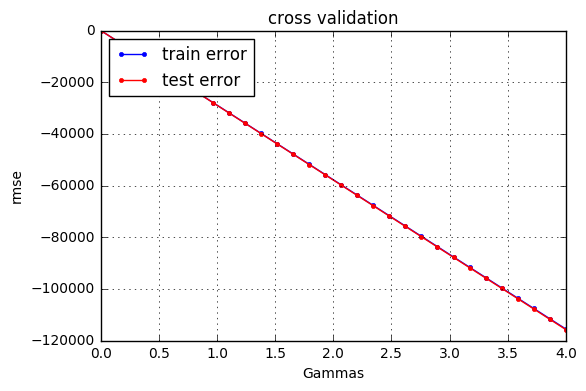

In [28]:
plt.plot(gammas, losses_tr, marker=".", color='b', label='train error')
plt.plot(gammas, losses_te, marker=".", color='r', label='test error')
plt.xlabel("Gammas")
plt.ylabel("rmse")
plt.title("cross validation")
plt.legend(loc=2)
plt.grid(True)
plt.savefig("cross_validation")